In [22]:
pip install scikit-image
pip install matplotlib

SyntaxError: invalid syntax (2481276048.py, line 1)

In [85]:
def percent(pred_y, y_val):
    A = np.array(pred_y)
    B = np.array(y_val)
    equal_num = (A == B)
    a = np.count_nonzero(equal_num)
    b = len(pred_y)
    c = ((a/b)*100)
    return c
percent(pred_y, y_val)

24.137931034482758

In [18]:
# create features and targets in data frame


from skimage.io import imread
from skimage.transform import resize
import numpy as np
import pandas as pd
import cv2
import os

Categories = ['Bear', 'Cat', 'Dog', 'Elephant', 'Goat', 'Horse', 'Lion', 'Tiger', 'Wolf']


flat_data_arr = []


target_arr = []


for i in Categories:
    print(f'loading... category : {i}')
   
    path=os.path.join(r"C:\Users\User\Desktop\Project folder\mammals", i) # joins the first part of the directory with the species' name
    for img in os.listdir(path): # for all entries in  the directory WHICH ARE THE IMAGES


        img_array = imread(os.path.join(path, img)) # create an array for the images, the array stores the path of each image


        img_resized = resize(img_array, (150, 150, 3)) # resizes all the images so they are uniform


        flat_data_arr.append(img_resized.flatten()) # also resizes the image into a 1d array


        target_arr.append(Categories.index(i)) # appends the name of the species


    print(f'loaded category: {i} successfully')


flat_data = np.array(flat_data_arr)
print(flat_data.shape)


target = np.array(target_arr) # species


df=pd.DataFrame(flat_data)
df['Target'] = target # label?
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

loading... category : Bear
loaded category: Bear successfully
loading... category : Cat
loaded category: Cat successfully
loading... category : Dog
loaded category: Dog successfully
loading... category : Elephant
loaded category: Elephant successfully
loading... category : Goat
loaded category: Goat successfully
loading... category : Horse
loaded category: Horse successfully
loading... category : Lion
loaded category: Lion successfully
loading... category : Tiger
loaded category: Tiger successfully
loading... category : Wolf
loaded category: Wolf successfully
(574, 67500)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# x is the pixel values


#stratify (biases), target = y (label), validation data set (search it up)


x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state=42, test_size=0.2, shuffle=True)
print('x_train : ')
print(x_train.head())
print(x_train.shape)
print('')
print('x_test : ')
print(x_test.head())
print(x_test.shape)
print('')
print('y_train : ')
print(y_train.head())
print(y_train.shape)
print('')
print('y_test : ')
print(y_test.head())
print(y_test.shape)


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify = y_train, random_state=42, train_size=0.875 , shuffle=True) # train size = 0.8 x 0.875
print('x_val : ')
print(x_val.head())
print(x_val.shape)
print('')
print('y_val : ')
print(y_val.head())
print(y_val.shape)
print('')




x_train : 
        0         1         2         3         4         5         6      \
185  0.495022  0.563735  0.588241  0.429684  0.472286  0.430181  0.495603   
224  0.122604  0.131681  0.040747  0.109180  0.113031  0.050263  0.109257   
221  0.064910  0.125163  0.096839  0.060222  0.119524  0.097071  0.065052   
31   0.076931  0.101664  0.051198  0.072200  0.093868  0.056804  0.080117   
25   0.745494  0.709339  0.674113  0.753952  0.722700  0.689705  0.721174   

        7         8         9      ...     67490     67491     67492  \
185  0.542755  0.533981  0.624805  ...  0.251238  0.589041  0.589051   
224  0.102468  0.058677  0.130758  ...  0.574754  0.984080  0.795583   
221  0.118876  0.100543  0.073667  ...  0.536786  0.557664  0.528423   
31   0.102504  0.057921  0.106613  ...  0.801922  0.601461  0.632388   
25   0.688910  0.659137  0.617190  ...  0.490024  0.621847  0.565066   

        67493     67494     67495     67496     67497     67498     67499  
185  0.339815  0.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
import tqdm
models = []
accuracy = []
for i in tqdm.tqdm(range(1, 100)):
    neigh = KNeighborsClassifier(i)
    neigh.fit(x_train, y_train)
    models.append(neigh)
    pred_y = neigh.predict(x_val)
    accuracy.append(percent(pred_y,y_val))
    

100%|██████████| 99/99 [01:09<00:00,  1.43it/s]


Text(0, 0.5, 'Accuracy on validation set')

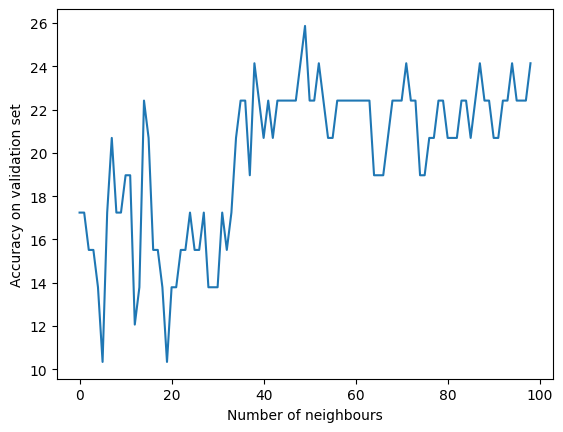

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.lineplot(accuracy)
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy on validation set")


In [76]:
maxvalue = max(accuracy)
print(maxvalue)

25.862068965517242


In [79]:
max(enumerate(accuracy),key=lambda x: x[1])[0]

49

In [81]:
best_model = models[49]

In [82]:
pred_test_y = best_model.predict(x_test)
percent(pred_test_y, y_test)

20.0